<a href="https://colab.research.google.com/github/agu06/KaggleX-AI-ML-Skill-Assessment-Challenge/blob/main/KaggleX_Skill_Assessment_Challenge_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# List the contents of a directory
import os
print(os.listdir('/content/drive/My Drive/'))


Mounted at /content/drive
['Getting started.pdf', 'agu joseph cv.doc', 'AGU JOSEPH CV.pdf', 'Bolt cover letter.pdf', 'Bolt cover letter.docx', 'agu joseph cv.docx', '2020_10_28_5396727691252165881.jpg', 'agu joseph CV.doc', 'Cv', 'IMG_20171022_142832.jpg', 'nat id (1).jpg', '1511294963172 (1).jpg', 'nat id 1 (1).jpg', 'passpt (1).jpg', 'passpt 1 (1).jpg', '1511294958830 (1).jpg', 'IMG_20171022_142700 (1).jpg', '1511294963711 (1).jpg', '1511294963475 (1).jpg', '1511294963925 (1).jpg', 'aj cv (1).doc', '1511294960050 (1).jpg', 'ENH ID (1).jpg', '1511294962974.jpg', 'ENH ID 1 (1).jpg', '1511294962422.jpg', '1511294952531 (1).jpg', '002 (1).jpg', '001 (2).jpg', '001.jpg', 'Copy of Product Management A-Z: Course Slides.gdoc', 'Copy of PM A-Z Course Workbook: Uber.gdoc', 'cognitive DATA SCIENCE METHODOLOGY.gdoc', 'edX PROGRAMMING FOR DATA SCIENCE.gdoc', 'Resume (3).gdoc', 'HOW WOULD YOU IMPROVE INSTAGRAM STORIES.gdoc', 'Taking your baby steps in Product Management.gdoc', 'LinkedIn summary 1.

In [ ]:
# Define the paths to your files in Google Drive
train_file_path = '/content/drive/My Drive/car-predictions/train1.csv'
test_file_path = '/content/drive/My Drive/car-predictions/test2.csv'

# Load the CSV files into pandas dataframes
train1 = pd.read_csv(train_file_path)
test = pd.read_csv(test_file_path)

In [ ]:
# Display the first few rows of each dataframe
print(train1.head())

   id    brand          model  model_year  milage fuel_type  \
0   0     Ford   F-150 Lariat        2018   74349  Gasoline   
1   1      BMW          335 i        2007   80000  Gasoline   
2   2   Jaguar      XF Luxury        2009   91491  Gasoline   
3   3      BMW   X7 xDrive40i        2022    2437    Hybrid   
4   4  Pontiac  Firebird Base        2001  111000  Gasoline   

                                              engine  \
0      375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel   
1  300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...   
2       300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel   
3  335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...   
4      200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel   

                     transmission ext_col int_col       accident clean_title  \
0                    10-Speed A/T    Blue    Gray  None reported         Yes   
1                     6-Speed M/T   Black   Black  None reported         Yes   
2                     6-Speed A/T  Purple   

In [ ]:
# Display the first few rows of each dataframe
print(test.head())

      id          brand                   model  model_year  milage fuel_type  \
0  51470            BMW                 M4 Base        2019    7200  Gasoline   
1  51471  Mercedes-Benz       CLK-Class CLK 350        2007   21500  Gasoline   
2  51472        Porsche               Boxster S        2005   72166  Gasoline   
3  51473        Hyundai  Genesis Coupe 3.8 Base        2013   89000  Gasoline   
4  51474       Cadillac         CTS Performance        2013   61600  Gasoline   

                                              engine  \
0  425.0HP 3.0L Straight 6 Cylinder Engine Gasoli...   
1      268.0HP 3.5L V6 Cylinder Engine Gasoline Fuel   
2  280.0HP 3.2L Flat 6 Cylinder Engine Gasoline Fuel   
3      348.0HP 3.8L V6 Cylinder Engine Gasoline Fuel   
4      318.0HP 3.6L V6 Cylinder Engine Gasoline Fuel   

                     transmission ext_col int_col  \
0  Transmission w/Dual Shift Mode   Black   Black   
1                             A/T  Silver   Black   
2                

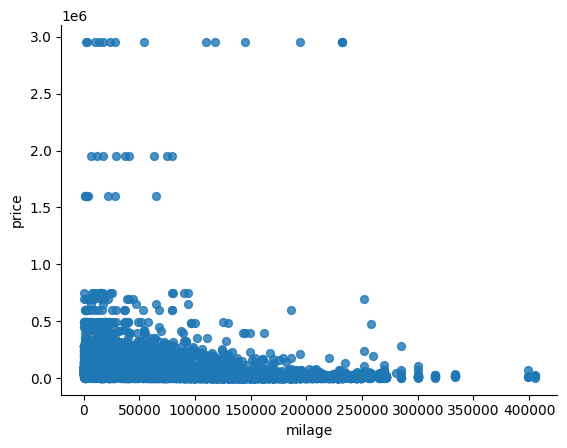

In [ ]:
# @title milage vs price

from matplotlib import pyplot as plt
train1.plot(kind='scatter', x='milage', y='price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
print(train1.describe())

                 id    model_year         milage         price
count  54273.000000  54273.000000   54273.000000  5.427300e+04
mean   27136.000000   2015.091979   72746.175667  3.921844e+04
std    15667.409917      5.588909   50469.490448  7.282634e+04
min        0.000000   1974.000000     100.000000  2.000000e+03
25%    13568.000000   2012.000000   32268.000000  1.550000e+04
50%    27136.000000   2016.000000   66107.000000  2.800000e+04
75%    40704.000000   2019.000000  102000.000000  4.500000e+04
max    54272.000000   2024.000000  405000.000000  2.954083e+06


In [ ]:
# fig, axes = plt.subplots(len(train1.columns) -1, 1, figsize=(10, (len(train1.columns) -1) * 4), constrained_layout=True)

# if not isinstance(axes, np.ndarray):
#   axes = [axes]

# plot_index = 0

# for column in train1.columns:
#   if column == 'id':
#     continue
#   ax = axes[plot_index]
#   if train1[column].dtype == 'object':
#     train1[column].value_counts().plot(kind='bar', ax=ax)
#     ax.set_ylabel('count')
#   else:
#     train1[column].plot(kind='hist', ax=ax, bins=15)
#     ax.set_ylabel('frequency')
#   ax.set_title(column)
#   plot_index += 1


# plt.subplots_adjust(hspace=0.5)
# plt.show()



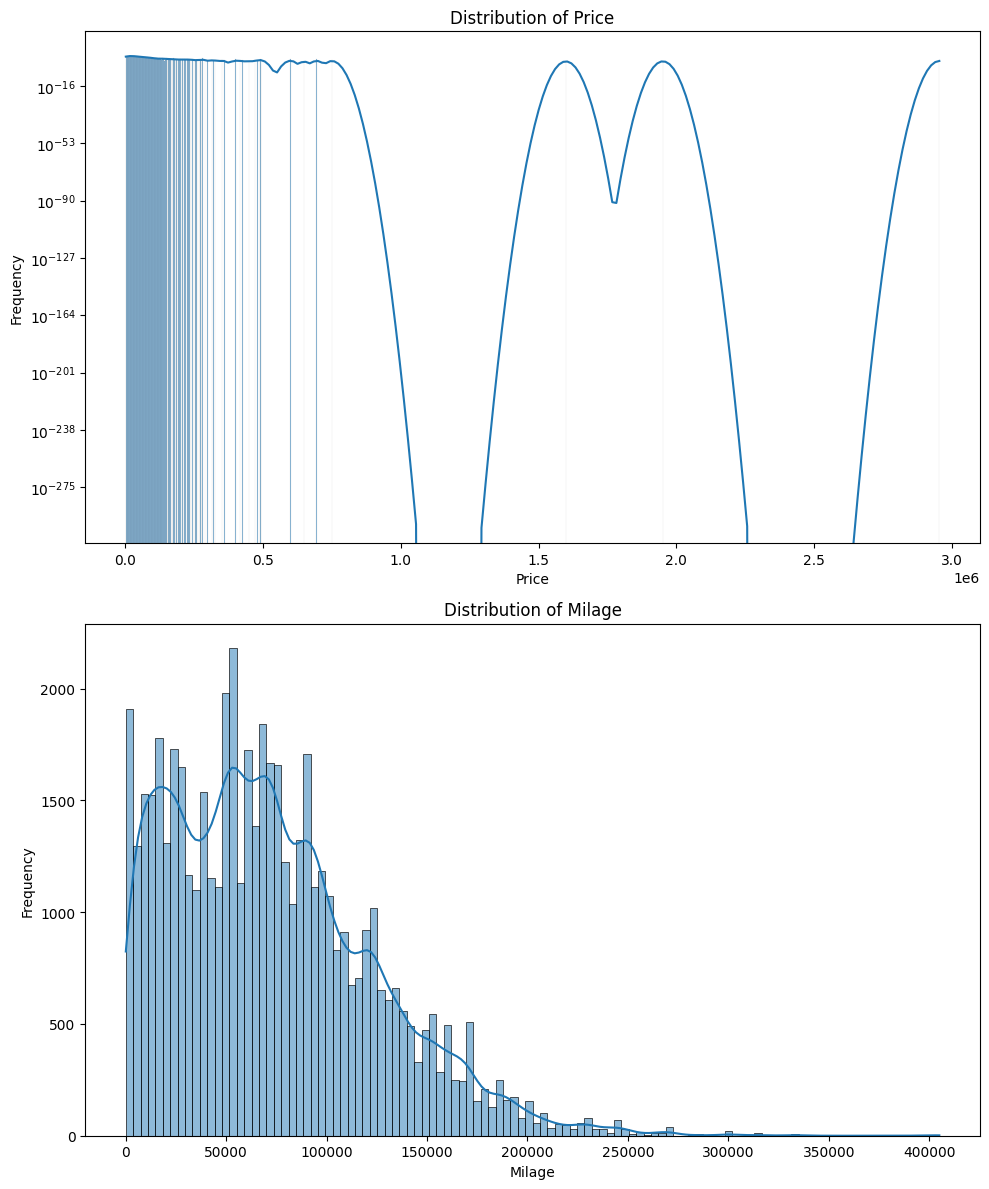

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for 'price' and 'milage'
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

sns.histplot(train1['price'], kde=True, ax=axes[0])
axes[0].set_title('Distribution of Price')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frequency')
axes[0].set_yscale('log')

sns.histplot(train1['milage'], kde=True, ax=axes[1])
axes[1].set_title('Distribution of Milage')
axes[1].set_xlabel('Milage')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

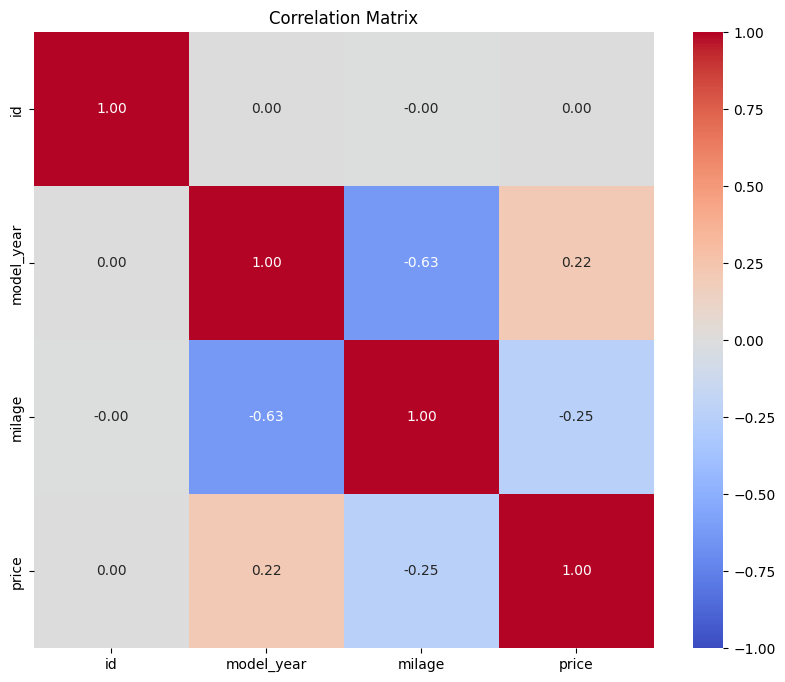

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(train1.select_dtypes(include=['number']).corr(), annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show

In [ ]:
current_year = 2024
train1['car_age'] = current_year - train1['model_year']

for index, row in train1.loc[:, ['brand', 'model', 'price', 'car_age']].head(100).iterrows():
  print(list(row))

['Ford', 'F-150 Lariat', 11000, 6]
['BMW', '335 i', 8250, 17]
['Jaguar', 'XF Luxury', 15000, 15]
['BMW', 'X7 xDrive40i', 63500, 2]
['Pontiac', 'Firebird Base', 7850, 23]
['Acura', 'Integra LS', 4995, 21]
['Audi', 'S5 3.0T Prestige', 26500, 10]
['GMC', 'Acadia SLT-1', 25500, 5]
['Audi', 'A3 2.0T Tech Premium', 13999, 8]
['Acura', 'MDX Technology', 6700, 17]
['Maserati', 'Quattroporte S Q4 GranLusso', 124995, 6]
['Chevrolet', 'Tahoe Premier', 49900, 7]
['Porsche', 'Cayenne S', 40000, 10]
['Audi', 'Q7 55 Prestige', 28250, 5]
['Mercedes-Benz', 'C-Class C 300 4MATIC Sport', 23500, 11]
['GMC', 'Terrain SLT-1', 36800, 6]
['Tesla', 'Model 3 Long Range', 138999, 3]
['Lexus', 'LS 460 Base', 66200, 7]
['GMC', 'Sierra 2500 SLE', 31900, 9]
['Kia', 'Telluride LX', 234000, 2]
['GMC', 'Terrain SLE', 26485, 4]
['Ford', 'Transit-350 XLT', 33500, 11]
['Lincoln', 'MKZ Base', 9500, 9]
['Ford', 'Mustang EcoBoost Premium', 36500, 3]
['Dodge', 'Challenger GT', 31300, 8]
['Chevrolet', 'Corvette Z06', 65000, 8]

In [ ]:
current_year = 2024
test['car_age'] = current_year - test['model_year']

for index, row in test.loc[:, ['brand', 'model', 'car_age']].head(100).iterrows():
  print(list(row))

['BMW', 'M4 Base', 5]
['Mercedes-Benz', 'CLK-Class CLK 350', 17]
['Porsche', 'Boxster S', 19]
['Hyundai', 'Genesis Coupe 3.8 Base', 11]
['Cadillac', 'CTS Performance', 11]
['Land', 'Rover Range Rover 3.0L Supercharged HSE', 8]
['Ford', 'F-250 XLT', 10]
['Dodge', 'Ram 1500 Laramie', 20]
['Chevrolet', 'Suburban Premier', 5]
['INFINITI', 'QX80 Base', 8]
['Mercedes-Benz', 'C-Class C 300 4MATIC', 6]
['Lincoln', 'MKZ Base', 10]
['Porsche', '911 Carrera 4S', 4]
['Ford', 'Expedition Platinum', 3]
['Audi', 'Q7 55 Prestige', 5]
['Ford', 'Expedition Limited', 6]
['Lexus', 'IS 250 Base', 14]
['Chevrolet', 'Tahoe Premier', 3]
['Dodge', 'Ram 1500 ST', 13]
['BMW', 'X5 3.0si', 10]
['Nissan', 'Xterra Pro-4X', 12]
['Ford', 'Mustang GT Premium', 17]
['BMW', '650 i', 10]
['Lexus', 'IS 300 Base', 14]
['Porsche', '911 Carrera 4S', 7]
['Hyundai', 'Genesis Coupe 3.8 R-Spec', 11]
['BMW', 'M4 Base', 9]
['BMW', 'M4 Base', 6]
['Land', 'Rover Range Rover Velar P250 SE R-Dynamic', 10]
['BMW', 'M240 i', 3]
['Lincoln

In [ ]:
# train1['price_per_mile'] = train1['price'] / train1['milage']

# for index, row in train1.loc[:, ['brand', 'model', 'price', 'car_age', 'price_per_mile']].head(100).iterrows():
#   print(list(row))

In [ ]:
train1.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,car_age
0,0,Ford,F-150 Lariat,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,11000,6
1,1,BMW,335 i,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,8250,17
2,2,Jaguar,XF Luxury,2009,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,Yes,15000,15
3,3,BMW,X7 xDrive40i,2022,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,63500,2
4,4,Pontiac,Firebird Base,2001,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,7850,23


In [ ]:
test.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,car_age
0,51470,BMW,M4 Base,2019,7200,Gasoline,425.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,5
1,51471,Mercedes-Benz,CLK-Class CLK 350,2007,21500,Gasoline,268.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,Silver,Black,At least 1 accident or damage reported,Yes,17
2,51472,Porsche,Boxster S,2005,72166,Gasoline,280.0HP 3.2L Flat 6 Cylinder Engine Gasoline Fuel,6-Speed M/T,Silver,Gray,At least 1 accident or damage reported,Yes,19
3,51473,Hyundai,Genesis Coupe 3.8 Base,2013,89000,Gasoline,348.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Silver,Black,None reported,Yes,11
4,51474,Cadillac,CTS Performance,2013,61600,Gasoline,318.0HP 3.6L V6 Cylinder Engine Gasoline Fuel,6-Speed A/T,Blue,Black,None reported,Yes,11


In [ ]:
print(f"{train1['brand'].nunique()}")
print(f"{train1['model'].nunique()}")

53
1827


In [ ]:
original_test = test.copy()

In [ ]:
# Identify categorical columns
categorical_columns = train1.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:", categorical_columns)

# Function to apply frequency encoding
def frequency_encoding(df, column):
    if column in df.columns:
        freq_encoding = df[column].value_counts(normalize=True)
        df[column + '_freq'] = df[column].map(freq_encoding)
    return df

# Apply frequency encoding to all categorical columns in train1
for column in categorical_columns:
    train1 = frequency_encoding(train1, column)

# Apply frequency encoding to all categorical columns in test
for column in categorical_columns:
    test = frequency_encoding(test, column)

# Drop the original categorical columns
train1 = train1.drop(columns=[col for col in categorical_columns if col in train1.columns])
test = test.drop(columns=[col for col in categorical_columns if col in test.columns])

# Verify the changes
print(train1.head())
print(test.head())

Categorical columns: ['brand', 'model', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title']
   id  model_year  milage  price  car_age  brand_freq  model_freq  \
0   0        2018   74349  11000        6    0.123561    0.009139   
1   1        2007   80000   8250       17    0.135777    0.004219   
2   2        2009   91491  15000       15    0.012179    0.000387   
3   3        2022    2437  63500        2    0.135777    0.003317   
4   4        2001  111000   7850       23    0.002745    0.000295   

   fuel_type_freq  engine_freq  transmission_freq  ext_col_freq  int_col_freq  \
0        0.910932     0.012603           0.040296      0.086010      0.115195   
1        0.910932     0.026754           0.066663      0.277818      0.586295   
2        0.910932     0.001935           0.109520      0.001732      0.147311   
3        0.032539     0.004183           0.118917      0.145726      0.041254   
4        0.910932     0.002064           0.308754   

In [ ]:
# Split the data into features and target variable
X = train1.drop(['price'], axis=1)
y = train1['price']

# Split into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_valid)

# Train a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_valid)

# Evaluate the models
print('Linear Regression MAE:', mean_absolute_error(y_valid, y_pred_lr))
print('Linear Regression MSE:', mean_squared_error(y_valid, y_pred_lr))
print('Linear Regression R^2:', r2_score(y_valid, y_pred_lr))

print('Random Forest MAE:', mean_absolute_error(y_valid, y_pred_rf))
print('Random Forest MSE:', mean_squared_error(y_valid, y_pred_rf))
print('Random Forest R^2:', r2_score(y_valid, y_pred_rf))

  # # Ensure test has the same features as X_train
  # # Align the test dataframe to have the same column order as X_train
  # test = test[X_train.columns]

  # # Generate predictions on the test data
  # test_predictions = rf_model.predict(test)

  # # Create a DataFrame for the predictions
  # predictions_df = pd.DataFrame({'price': test_predictions})

  # # Save the predictions to a new CSV file
  # predictions_df.to_csv('car_price_predictions.csv', index=False)

# print("Predictions saved to car_price_predictions.csv")

# # Assuming Random Forest performs better, use it for predictions
# # Generate predictions on the test data
# test_predictions = rf_model.predict(test)

# # Populate the 'price' column in the sample_submission with predictions
# sample_submission['price'] = test_predictions

# # Save the updated sample_submission to a new CSV file
# sample_submission.to_csv('sample_submission.csv', index=False)

Linear Regression MAE: 19953.917793268974
Linear Regression MSE: 2539107631.853105
Linear Regression R^2: 0.13591725738705285
Random Forest MAE: 19349.015719944724
Random Forest MSE: 3336072664.183556
Random Forest R^2: -0.13529760655320588


In [ ]:
# Assuming Random Forest performs better, use it for predictions
# Generate predictions on the test data
test_predictions = rf_model.predict(test)

# Create a DataFrame with the original test columns and the predictions
predictions_df = original_test.copy()
predictions_df['price'] = test_predictions

# Save the updated DataFrame to a new CSV file
predictions_df.to_csv('car_price_predictions.csv', index=False)

print("Predictions saved to car_price_predictions.csv")

# from google.colab import files

# Download the file
# files.download('car_price_predictions.csv')

Predictions saved to car_price_predictions.csv


In [27]:
!git --version


git version 2.34.1


In [28]:
!git init


Reinitialized existing Git repository in /content/KaggleX-AI-ML-Skill-Assessment-Challenge/.git/


In [29]:
!git add .

In [30]:
!git commit -m "Second commit"


On branch main
nothing to commit, working tree clean


In [31]:
!git push origin main


fatal: could not read Username for 'https://github.com': No such device or address


In [32]:
git config credential.helper store

SyntaxError: invalid syntax (<ipython-input-32-5f4f02a4877a>, line 1)